(1) 요구사항 정의

- 손글씨 숫자 인식
- 모델 저장 / 불러오기
- 베스트 모델 저장 / 불러오기
- 학습 중단
- 과대적합 방지 : Dropout
- 직접 우리가 손으로 쓴 숫자도 적용해서 인식

MINST 손글씨 숫자 데이터셋

- 0-9까지의 숫자를 사람이 직접 쓴 데이터 셋
- 각 숫자는 28x28 크기로 구성
- 훈련데이터 6만개, 테스트데이터 만개

In [1]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

데이터 불러오기

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

숫자 이미지 확인

7

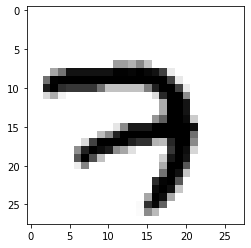

In [4]:
import matplotlib.pyplot as plt

# 이미지와 레벨 데이터를 가져옴
img = X_train[5000]
label = y_train[5000]

plt.imshow(img, cmap=plt.cm.binary)
label

전처리

- 이미지는 2차원 데이터 -> 신경망에선 1차원데이터로 입력 -> 변환 필요
- 이미지 픽셀값들이 0-255범위 -> 분산이 커서 정확도 떨어질 수 있음 -> 0-1사이로 스케일링

In [5]:
# 2차원 이미지를 1차원 데이터 변경 (신경망에는 1차원 데이터로 입력되므로)
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
# 0-255범위의 값을 0-1 범위로 변경 (분산을 감소)
# 픽셀값들이 정수로 되어있기 때문에 255로 나누면 0과 1만 나오는 문제
#     -> 픽셀값들을 실수로 변환한후에 나누어주어야 0과 1사이값으로 나옴
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [7]:
import pandas as pd

pd.Series(y_train).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [8]:
pd.Series(y_test).unique()

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8], dtype=uint8)

In [9]:
# 원핫 인코딩
from tensorflow.keras.utils import to_categorical

y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

y_train_en.shape, y_test_en.shape

((60000, 10), (10000, 10))

신경망 설계

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# 입력층
model1.add(Dense(units=512, input_dim=784, activation="relu"))

# 은닉층
# units의 수를 늘려가는 방법 : 인코딩 (특성을 추출, 특성을 늘려줌)
# units의 수를 줄여가는 방법 : 디코딩 (특성을 정리, 특성을 선택)
model1.add(Dense(units=256, activation="relu"))
model1.add(Dense(units=128, activation="relu"))

# 출력층
model1.add(Dense(units=10, activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [11]:
model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [12]:
h1 = model1.fit(X_train, y_train_en, epochs=10, batch_size=128,
                validation_data=(X_test, y_test_en))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2336 - accuracy: 0.9292 - val_loss: 0.1048 - val_accuracy: 0.9683
Epoch 2/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0849 - accuracy: 0.9739 - val_loss: 0.0863 - val_accuracy: 0.9733
Epoch 3/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0819 - val_accuracy: 0.9740
Epoch 4/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0825 - val_accuracy: 0.9757
Epoch 5/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0324 - accuracy: 0.9894 - val_loss: 0.0676 - val_accuracy: 0.9805
Epoch 6/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0916 - val_accuracy: 0.9757
Epoch 7/10
60000/60000 [==============================] 

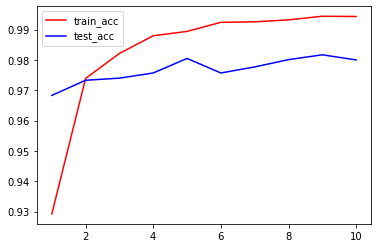

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 결과 시각화
acc = h1.history["accuracy"]
val_acc = h1.history["val_accuracy"]
loss = h1.history["loss"]
val_loss = h1.history["val_loss"]

e = range(1, len(acc) + 1)

plt.plot(e, acc, "-", color="red", label="train_acc")
plt.plot(e, val_acc, "-", color="blue", label="test_acc")
plt.legend()

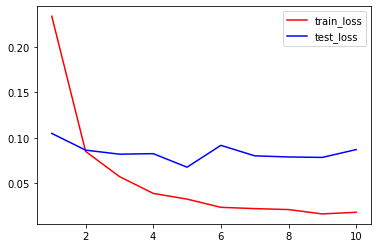

In [14]:
plt.plot(e, loss, "-", color="red", label="train_loss")
plt.plot(e, val_loss, "-", color="blue", label="test_loss")
plt.legend()

예측

In [15]:
pred = model1.predict(X_test[100:101])

pred

array([[1.4017828e-05, 1.9895117e-07, 5.5150230e-07, 5.9753149e-09,
        7.8609906e-07, 8.2428375e-07, 9.9998081e-01, 3.4380346e-10,
        2.7642916e-06, 1.1042121e-08]], dtype=float32)

In [16]:
y_test[100]

6

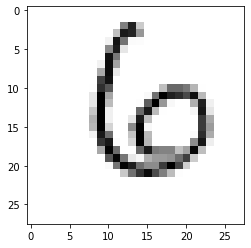

In [17]:
# 이미지로 출력하려면 1차원 데이터를 다시 2차원으로 변경
img = X_test[100].reshape(28, 28)

plt.imshow(img, cmap=plt.cm.binary)

In [18]:
print(X_test[100].shape)
print(img.shape)

(784,)
(28, 28)


In [19]:
pred_class = model1.predict_classes(X_test[100:101])
pred_class

array([6], dtype=int64)

학습된 모델을 저장

In [20]:
model1.save("./mnist_model.h5")

직접 손으로 숫자를 쓴 다음 인식을 해보자

In [21]:
# 저장된 모델을 불러오기
from tensorflow.keras.models import load_model

model2 = load_model("./mnist_model.h5")

손글씨를 불러오기

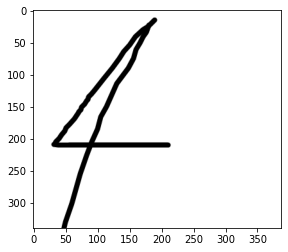

In [22]:
import PIL.Image as pil
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
# convert("L") : 흑백이미지를 불러오기
gray_img = pil.open("./data/n4.png").convert("L")

plt.imshow(gray_img, cmap="gray")

In [23]:
# 학습 데이터로 쓸려면 이미지데이터에서 배열로 변환
arrimg = np.array(gray_img)

arrimg.shape

(340, 388)

In [24]:
# 원래 MNIST 데이터가 검정색 바탕에 흰색 글씨로 되어 있기때문에
# 같은 형태로 변경하기 위해서 최대값에 빼줌
arrimg = 255 - arrimg

arrimg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# 2차원 -> 1차원
test_img = arrimg.reshape(1, 28*28)

# 0-255 -> 0.0 - 1.0 
test_img = test_img.astype("float32") / 255

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-fb1086c2cd8d>", line 2, in <module>
    test_img = arrimg.reshape(1, 28*28)
ValueError: cannot reshape array of size 131920 into shape (1,784)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of

In [ ]:
pred = model2.predict(test_img)
pred

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-21d352cb82eb>", line 1, in <module>
    pred = model2.predict(test_img)
NameError: name 'test_img' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C

In [ ]:
pred_class = model2.predict_classes(test_img)
pred_class

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-b99f13340520>", line 1, in <module>
    pred_class = model2.predict_classes(test_img)
NameError: name 'test_img' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_off

베스트 모델 찾아서 저장하기

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# 입력층
model1.add(Dense(units=512, input_dim=784, activation="relu"))

# 은닉층
# units의 수를 늘려가는 방법 : 인코딩 (특성을 추출, 특성을 늘려줌)
# units의 수를 줄여가는 방법 : 디코딩 (특성을 정리, 특성을 선택)
model1.add(Dense(units=256, activation="relu"))
model1.add(Dense(units=128, activation="relu"))

# 출력층
model1.add(Dense(units=10, activation="softmax"))

model1.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 330
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [26]:
model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os 

# 베스트 모델을 저장할 폴더
MODEL_DIR = "./model/"

# 해당 폴더가 없다면
if not os.path.exists(MODEL_DIR) : 
    # 폴더를 생성한다
    os.mkdir(MODEL_DIR)
    
# 저장할 파일명의 형식을 저장
# {epoch:03d} : epoch 값을 정수형 3자리로 표시, 
#               만약 3자리 안되면 앞자리는 0으로 채움
#         -> mnist_001  or minst_010
# {loss:.3f} : val_accuracy 값을 소수점 3째자리까지 표시
#         -> mnist_001_0.080

# mnist_001_0.080_0.070.hdf5
filename = MODEL_DIR + "mnist_{epoch:03d}_{loss:.3f}_{val_loss:.3f}.hdf5"

# 베스트모델 찾기
# filepath : 저장할 위치와 파일명
# monitor : 베스트 모델의 기준값
# save_best_only : 현재 모델보다 기준이 더 나은 모델만 저장할 것인지 여부
mc = ModelCheckpoint(filepath=filename,
                     monitor="val_loss",
                     save_best_only=True)

In [28]:
# callbacks : 리스트에 있는 콜백함수들을 epoch마다 실행
h2 = model1.fit(X_train, y_train_en, epochs=10, batch_size=128,
                validation_data=(X_test, y_test_en),
                callbacks=[mc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2295 - accuracy: 0.9332 - val_loss: 0.1257 - val_accuracy: 0.9614
Epoch 2/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0846 - accuracy: 0.9737 - val_loss: 0.0858 - val_accuracy: 0.9714
Epoch 3/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.0760 - val_accuracy: 0.9766
Epoch 4/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0723 - val_accuracy: 0.9796
Epoch 5/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0755 - val_accuracy: 0.9777
Epoch 6/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0722 - val_accuracy: 0.9814
Epoch 7/10
60000/60000 [==============================] 

In [ ]:
best_model = load_model("./model/mnist_006_0.026_0.073.hdf5")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-c4aeed805472>", line 1, in <module>
    best_model = load_model("./model/mnist_006_0.026_0.073.hdf5")
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\tensorflow_core\python\keras\saving\save.py", line 149, in load_model
    loader_impl.parse_saved_model(filepath)
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\tensorflow_core\python\saved_model\loader_impl.py", line 83, in parse_saved_model
    constants.SAVED_MODEL_FILENAME_PB))
OSError: SavedModel file does not exist at: ./model/mnist_006_0.026_0.073.hdf5/{saved_model.pbtxt|saved_model.pb}

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\i

In [ ]:
pred = best_model.predict_classes(test_img)
pred

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-6b17a90a2d9e>", line 1, in <module>
    pred = best_model.predict_classes(test_img)
NameError: name 'best_model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SM2139\anaconda3\envs\deep01\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_off

epochs 값은 얼마가 좋을까요 ? 최적의 epochs 값은 ?

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# 입력층
model1.add(Dense(units=512, input_dim=784, activation="relu"))

# 은닉층
# units의 수를 늘려가는 방법 : 인코딩 (특성을 추출, 특성을 늘려줌)
# units의 수를 줄여가는 방법 : 디코딩 (특성을 정리, 특성을 선택)
model1.add(Dense(units=256, activation="relu"))
model1.add(Dense(units=128, activation="relu"))

# 출력층
model1.add(Dense(units=10, activation="softmax"))

model1.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 332
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [31]:
# 학습이 더 이상 좋지지않으면 학습을 중단
from tensorflow.keras.callbacks import EarlyStopping

# monitor : 중단하는 중단 (좋아지지 않는다는 기준)
# patience : 학습이 나아지지 않더라도 기다려주는 epochs 수
es = EarlyStopping(monitor="val_loss",
                   patience=10)

In [32]:
model1.fit(X_train, y_train_en, epochs=10000, batch_size=128,
           validation_data=(X_test, y_test_en),
           callbacks=[mc, es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10000
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2251 - accuracy: 0.9347 - val_loss: 0.1052 - val_accuracy: 0.9675
Epoch 2/10000
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0851 - accuracy: 0.9737 - val_loss: 0.0738 - val_accuracy: 0.9754
Epoch 3/10000
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.0798 - val_accuracy: 0.9749
Epoch 4/10000
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0394 - accuracy: 0.9872 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 5/10000
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0748 - val_accuracy: 0.9780
Epoch 6/10000
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0780 - val_accuracy: 0.9777
Epoch 7/10000
60000/60000 [===========

전통적인 딥러닝의 문제점

- 많은 퍼셉트론 연산으로 인해 시간이 많이 걸리는 문제 -> GPU
- 많은 퍼셉트론을 사용하므로해서 생기는 복잡성 -> 과대적합 -> Dropout
- 활성화함수를 sigmoid, tanhs를 사용해서 생기는 기울기소실 -> Relu

Dropout

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

# 입력층
model1.add(Dense(units=512, input_dim=784, activation="relu"))

# 은닉층
model1.add(Dense(units=256, activation="relu"))
model1.add(Dense(units=128, activation="relu"))

# 퍼셉트론 중에서 50%는 사용하지 않겠다 
# epoch마다 사용하지 않는 퍼셉트론을 다를 수 있다
model1.add(Dropout(0.5))

# 출력층
model1.add(Dense(units=10, activation="softmax"))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [34]:
model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [35]:
h4 = model1.fit(X_train, y_train_en, epochs=10, batch_size=128,
             validation_data=(X_test, y_test_en))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2926 - accuracy: 0.9125 - val_loss: 0.1135 - val_accuracy: 0.9665
Epoch 2/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1097 - accuracy: 0.9686 - val_loss: 0.0894 - val_accuracy: 0.9714
Epoch 3/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0732 - accuracy: 0.9785 - val_loss: 0.0798 - val_accuracy: 0.9760
Epoch 4/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0537 - accuracy: 0.9841 - val_loss: 0.0788 - val_accuracy: 0.9792
Epoch 5/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.0718 - val_accuracy: 0.9783
Epoch 6/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0768 - val_accuracy: 0.9790
Epoch 7/10
60000/60000 [==============================] 

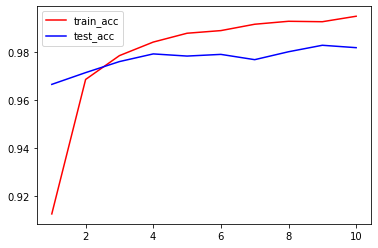

In [37]:
import matplotlib.pyplot as plt

acc = h4.history["accuracy"]
val_acc = h4.history["val_accuracy"]

e = range(1, len(acc) +1)

plt.plot(e, acc, "-", color="red", label="train_acc")
plt.plot(e, val_acc, "-", color="blue", label="test_acc")
plt.legend()

#### 기존 손글씨 모델의 제약사항
1. 모든 손글씨 이미지의 배경이 깔끔하다(0으로 뎅터화)
2. 손글씨의 각도가 일정하다(회전x)
3. 손글씨의 크기가 일정하다 (비슷한 크키로 중앙에 배치)